### Heroes Of Pymoli Data Analysis

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [258]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

## Player Count

* Display the total number of players


In [259]:
tot_num_players=purchase_data["SN"].nunique()

df1=pd.DataFrame(data=[tot_num_players],columns=['Total Players'])
df1

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [260]:
num_unique_items=purchase_data["Item ID"].nunique()

avg_price=purchase_data['Price'].mean().round(2)

num_purch=purchase_data["Purchase ID"].nunique()

tot_rev=purchase_data['Price'].sum()
# .map('${:,.2f}'.format)
#.map for full column
df2=pd.DataFrame(data=[[num_unique_items,avg_price,num_purch,tot_rev]],columns=['Number of Unique Items','Average Price','Number of Purchases','Total Revenue'])
df2["Total Revenue"]=df2["Total Revenue"].map('${:,.2f}'.format)
df2


,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [261]:
counts_gender=purchase_data.drop_duplicates(subset='SN').groupby('Gender').size()
percent_gender=purchase_data['Gender'].value_counts(normalize=True).round(4)*100

df33=pd.concat([counts_gender, percent_gender], axis=1)
df3=pd.DataFrame(data=(df33).values,index=(df33).index,columns=['Total Count','Percentage of Players'])

df3

,Total Count,Percentage of Players
Female,81.0,14.49
Male,484.0,83.59
Other / Non-Disclosed,11.0,1.92



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [262]:
purch_count_gender=purchase_data.groupby('Gender').size()

avg_purch_price=purchase_data.groupby('Gender')['Price'].mean().round(2)

total_purch_value=purchase_data.groupby('Gender')['Price'].sum().round(2)

avg_purch_total_pp=(total_purch_value/counts_gender).round(2)

data4=pd.concat([purch_count_gender,avg_purch_price,total_purch_value,avg_purch_total_pp],axis=1)
df4=pd.DataFrame(data=(data4).values,index=data4.index,columns=['Purchase Count','Average Purchase Price','Total Purchase Value','Avg Total Purchase per Person'])
df4["Total Purchase Value"]=df4["Total Purchase Value"].map('${:,.2f}'.format)
df4["Avg Total Purchase per Person"]=df4["Avg Total Purchase per Person"].map('${:,.2f}'.format)
df4


,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113.0,3.20,$361.94,$4.47
Male,652.0,3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15.0,3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [263]:
df5=purchase_data
df5Bins=[0,10,14,19,24,29,34,39,df5["Age"].max()]
df5Labels=["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]
df5["AgeGroup"]=pd.cut(df5["Age"],bins=df5Bins,labels=df5Labels)

df5Group=df5.groupby("AgeGroup")
df5CountEachBin=df5Group["AgeGroup"].size()
df5CountAll=df5["AgeGroup"].count() #ok
df5Perc=df5CountEachBin/df5CountAll

df55=pd.DataFrame({"Total Count":df5CountEachBin,"Percentage of Players":df5Perc})
df55["Percentage of Players"]=df55["Percentage of Players"].map('{:,.2%}'.format)
df55


,Total Count,Percentage of Players
AgeGroup,,
<10,32,4.10%
10-14,19,2.44%
15-19,136,17.44%
20-24,365,46.79%
25-29,101,12.95%
30-34,73,9.36%
35-39,41,5.26%
40+,13,1.67%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [264]:
data6=df5Group

purchCount6=data6["Purchase ID"].size()
avgPurchPrice6=data6["Price"].mean().round(2)
avgPurchTotal6=data6["Price"].sum()
avgTotPurchPPer6=(avgPurchTotal6/purchCount6).round(2)

df6=pd.DataFrame({"Purchase Count":purchCount6,"Average Purchase Price":avgPurchPrice6,"Total Purchase Value":avgPurchTotal6,"Avg Total Purchase per Person":avgTotPurchPPer6})
df6

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
AgeGroup,,,,
<10,32,3.40,108.96,3.40
10-14,19,2.68,50.95,2.68
15-19,136,3.04,412.89,3.04
20-24,365,3.05,1114.06,3.05
25-29,101,2.90,293.00,2.90
30-34,73,2.93,214.00,2.93
35-39,41,3.60,147.67,3.60
40+,13,2.94,38.24,2.94


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [265]:
PCount=purchase_data["SN"].value_counts()
PCount
AvgPPrice=purchase_data.groupby("SN")["Price"].mean().round(2)
AvgPPrice
TotPValue=purchase_data.groupby("SN")["Price"].sum().round(2)
TotPValue

data7=pd.concat([PCount,AvgPPrice,TotPValue],axis=1)
df7=pd.DataFrame(data=(data7).values,index=data7.index,columns=['Purchase Count','Average Purchase Price','Total Purchase Value']).head(5)
df7["Average Purchase Price"]=df7["Average Purchase Price"].map('${:,.2f}'.format)
df7["Total Purchase Value"]=df7["Total Purchase Value"].map('${:,.2f}'.format)
df7

,Purchase Count,Average Purchase Price,Total Purchase Value
Lisosia93,5.0,$3.79,$18.96
Iral74,4.0,$3.40,$13.62
Idastidru52,4.0,$3.86,$15.45
Lisim78,3.0,$3.34,$10.02
Aina42,3.0,$3.07,$9.22


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [266]:
retrieve3=purchase_data.loc[:,"Item ID":"Price"]
# retrieve3.head()
grouped3=retrieve3.groupby(["Item ID","Item Name"])
# grouped3.head()
pcount8=grouped3["Item ID"].size()
# pcount8
# purchase_data.groupby('Gender')['Price']
iprice8=grouped3["Price"].mean()
# iprice8
totPValu8=grouped3["Price"].sum().round(2)
# totPValu8
df8=pd.DataFrame({"Purchase Count":pcount8,"Item Price":iprice8,"Total Purchase Value":totPValu8}).sort_values(by="Purchase Count",ascending=False)
df8.head(5)



,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [267]:
df9=pd.DataFrame({"Purchase Count":pcount8,"Item Price":iprice8,"Total Purchase Value":totPValu8}).sort_values(by="Total Purchase Value",ascending=False)
df9.head(5)

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


Image of Data Manipulation with Pandas from DataCamp

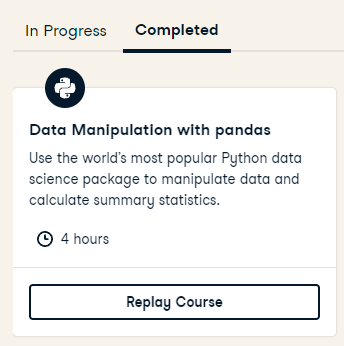

In [3]:
from IPython import display
display.Image("completedDataManipWPandas.png")